## Introduction
### Delfi Kusuma Wardhani
FTDS Batch 002

## Dataset Description

Dataset used in this project is an image that can be downloaded in this link: https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

Image source: https://edition.cnn.com/2020/10/30/world/dog-dna-intl-scli-gbr-scn/index.html

## Objective
The objective of this project is to implement the linear algebra and calculus concept in image processing. The image processing that I've worked on this project is edge detection of an image and perform some linear transformations on it. A partial derivative concept would be implemented in edge detection, while the linear algebra implementation will be used in linear transformation of the image.

## Import Library
The libraries used in this project are:
1. Pillow (PIL) - to open / read an image(.jpg) file
2. Numpy - for array processing and some mathematical operations
3. Matplotlib - for visualization

In [2]:
# Importing Library

from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

## Data Loading
I'm using the function Image.open() from Pillow library to open and read the image file.

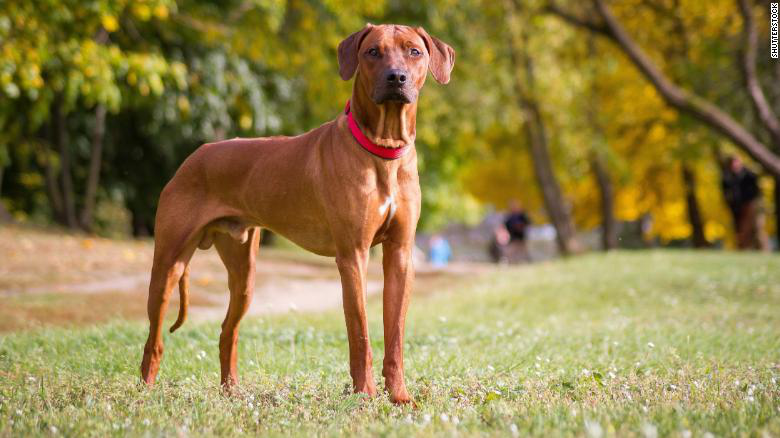

In [3]:
# Using Image.open() function to read the image file that already downloaded to repository
img = Image.open('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')

# Showing the image file
img

Then I transform the image file into array data type so we can see the elements which represent each pixels of the image. 

In [4]:
# Transforming image file into the array data type 
np_img = np.asarray(img)

# Showing the size and the elements inside of the array after the image is transformed
print(np_img.shape)
print(np_img)

(438, 780, 3)
[[[ 86  93  39]
  [ 88  93  39]
  [ 87  90  33]
  ...
  [ 48  41  15]
  [ 46  39  10]
  [ 59  52  23]]

 [[ 77  84  30]
  [ 77  84  30]
  [ 78  83  25]
  ...
  [ 46  39  13]
  [ 64  57  29]
  [ 37  30   1]]

 [[ 64  73  20]
  [ 66  73  19]
  [ 68  73  17]
  ...
  [ 56  48  25]
  [ 44  37   9]
  [ 70  60  33]]

 ...

 [[165 151 106]
  [159 144 101]
  [151 134  91]
  ...
  [150 139  85]
  [149 138  84]
  [145 134  80]]

 [[164 149 106]
  [157 142  99]
  [149 131  91]
  ...
  [155 143  93]
  [153 141  89]
  [148 136  84]]

 [[164 149 108]
  [157 142 101]
  [146 131  90]
  ...
  [160 148 100]
  [157 145  97]
  [150 138  90]]]


From the result above, we can see that the image has 3 dimensions of array because it is in RGB (Red Green Blue) format. Each elements in this array represents the values or numeric notation of colour in each pixels from the image. In order to do further exploration, it'd be necessary to transform this array into 2 dimensions only. Hence, we'll work on the data preprocessing first.

## Data Preprocessing
In this step, we'll convert the image file into grayscale format so we'll have only 2 dimensions of array instead of 3. I used one function from the pillow library to convert the image into grayscale, which is *'ImageOps.grayscale(file_image)'*.

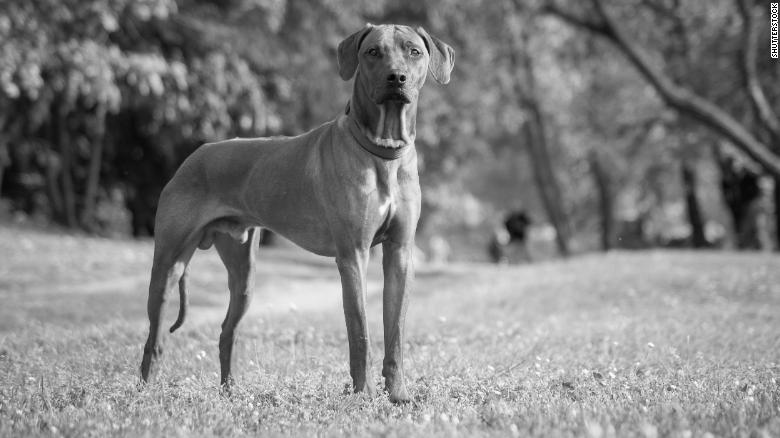

In [5]:
# from Library Pillow using the function ImageOps.grayscale() to change image into grayscale
grey_img = ImageOps.grayscale(img)
grey_img

Now we have the grayscale image and we'll transform back into the array data type.

In [6]:
# Transform the grayscale image into array
arr_grey = np.asarray(grey_img)

# Showing the size of the image array and its elements inside
print(arr_grey.shape)
arr_grey

(438, 780)


array([[ 85,  85,  83, ...,  40,  38,  51],
       [ 76,  76,  75, ...,  38,  56,  29],
       [ 64,  65,  65, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 136, 135, 131],
       [149, 142, 132, ..., 141, 139, 134],
       [149, 142, 131, ..., 146, 143, 136]], dtype=uint8)

The vector array dimension has decreased into 2, now the data is ready to be processed further.

## Image Processing
### 1. Edge Detection

The first step for edge detection of an image in this project is we find the gradient vector of each pixels in both x and y axis. We can find them by using the function $\frac{\partial I}{\partial x}$ and $\frac{\partial I}{\partial y}$ (partial derivative). Gradient ($\nabla I = \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y}$) represents the direction of most rapid change in intensity. In edge detection, we have to find out when the color is changing rapidly so it would let us know that it's the edge of the object in an image.

In [7]:
# Using np.gradient() function to find the gradient vector of each pixels
m = np.gradient(arr_grey)

# Show the result
m

[array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
        [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
        [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
        ...,
        [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
        [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
        [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]]),
 array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
        [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
        [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
        ...,
        [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
        [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
        [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])]

The operation above generate a list that consists 2 vector arrays. Then we separate this list of array into 2 variables based on the axis ($\partial x$ and $\partial y$).

In [8]:
# Determine the first array as dx and the second array as dy
dx = m[0]
dy = m[1] 

# Show result
print('dx:',dx)
print('dy:',dy)

dx: [[ -9.   -9.   -8.  ...  -2.   18.  -22. ]
 [-10.5 -10.   -9.  ...   4.   -1.    4.5]
 [ -9.   -9.   -8.  ... 107.5 -14.   20. ]
 ...
 [ -0.5  -2.   -2.5 ...   2.    1.5   1. ]
 [ -0.5  -1.   -1.5 ...   5.    4.    2.5]
 [  0.    0.   -1.  ...   5.    4.    2. ]]
dy: [[  0.   -1.   -2.5 ...  -1.5   5.5  13. ]
 [  0.   -0.5  -1.  ...   6.   -4.5 -27. ]
 [  1.    0.5   0.5 ...  -3.    6.   24. ]
 ...
 [ -6.   -8.   -9.5 ...   1.   -2.5  -4. ]
 [ -7.   -8.5  -8.5 ...   0.5  -3.5  -5. ]
 [ -7.   -9.   -9.  ...  -0.5  -5.   -7. ]]


Now from this result we can find the strength or magnitude of the edge. The next step of image edge detection is we calculate the gradient magnitude of each pixel with formula: $mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}$

In [9]:
# Calculate the gradient magnitude based on the formula
mag = np.sqrt(dx**2 + dy**2)

#Show result
mag

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

Now that we have the edge magnitude at every pixel, we still need to declare a pixel as being an edge or not. In other words, we need to threshold this edge map. In this project I use the single threshold instead of double to define the edge.

$\left \|\nabla I(x,y)\right\| < T$ , definitely not an edge

$\left \|\nabla I(x,y)\right\| \geq T$, definetely an edge

I'm using the library from Matplotlib to visualize the preview of derivative image while defining the threshold. First, I'll find out the preview image with the threshold = 25

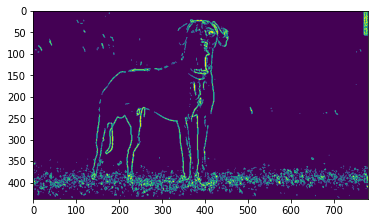

In [10]:
# Showing edge detection of the image with threshold = 25
plt.imshow(mag>=25)

From the result preview image we can see the edge detection still seem not quite optimal yet. Some edges of the dog object are still not detected. Now, we'll try to decreased the threshold become 15.

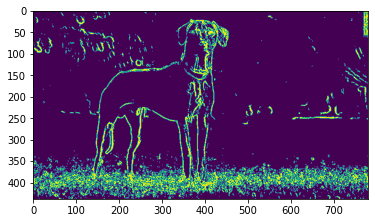

In [11]:
# Showing edge detection of the image with threshold = 15
plt.imshow(mag>15)

In this result, the edge of dog object in the image seem all detected successfully. There are also some edges of other objects are detected but not quite thoroughly. Now for the last experiment, I'm going to find out what if the threshold is decreased again into 7.

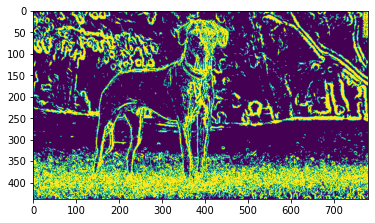

In [12]:
# Showing edge detection of the image with threshold = 7
plt.imshow(mag>7)

Now it's not only the edges of the dog object are detected, but also the other objects like leaf, tree branches, and grass.

#### With the different three threshold values for given input image:
1. T = 25, the edges are not recognised properly.
2. T = 15, the edges of dog object are recognised well and there are also some edges from other object recognised but not really well.
3. T = 7, the sharp edges of some objects are recognised properly.

According to these results, as higher as the threshold values, the less pixel would be recognised as an edge. To define the right threshold values would be depend on the desired output. If there is more than one object in an image, using a high value of threshold will result in less object detected. The less threshold value, the more edges of object detected.


### 2. Rotate Image
Now let's try to implement some linear algebra concept that commonly used in image processing. In this project, I'm going to try rotating the RGB image given as input before. Basically, there are already some simple or instant way to rotate the image using the provided library but now we're going to do it manually by transposing the matrix of an image.

This is the original image that we'll try to process:

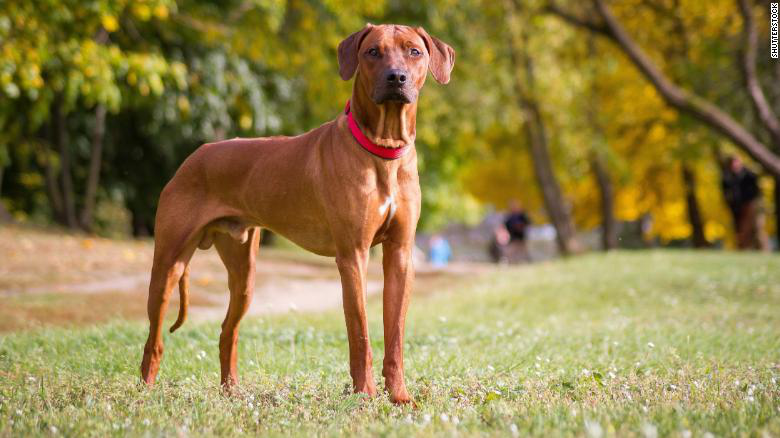

In [13]:
# Showing the image
img

Now we do transpose the matrix of this image, as we already converted before (np_img). Even it's a 3-dimensions of matrix, we only swap the first and the second array dimension, because the third dimension in this matrix is the RGB values and we don't want to disassamble them. The first and the second array dimension represent the x axis and y axis and these are the numbers that we'd transform.

In [14]:
# Using the library to transpose the matrix
c = np.transpose(np_img,(1,0,2)) # Adding the order number of the array that we'd like to switch

# Showing result
c

array([[[ 86,  93,  39],
        [ 77,  84,  30],
        [ 64,  73,  20],
        ...,
        [165, 151, 106],
        [164, 149, 106],
        [164, 149, 108]],

       [[ 88,  93,  39],
        [ 77,  84,  30],
        [ 66,  73,  19],
        ...,
        [159, 144, 101],
        [157, 142,  99],
        [157, 142, 101]],

       [[ 87,  90,  33],
        [ 78,  83,  25],
        [ 68,  73,  17],
        ...,
        [151, 134,  91],
        [149, 131,  91],
        [146, 131,  90]],

       ...,

       [[ 48,  41,  15],
        [ 46,  39,  13],
        [ 56,  48,  25],
        ...,
        [150, 139,  85],
        [155, 143,  93],
        [160, 148, 100]],

       [[ 46,  39,  10],
        [ 64,  57,  29],
        [ 44,  37,   9],
        ...,
        [149, 138,  84],
        [153, 141,  89],
        [157, 145,  97]],

       [[ 59,  52,  23],
        [ 37,  30,   1],
        [ 70,  60,  33],
        ...,
        [145, 134,  80],
        [148, 136,  84],
        [150, 138,  90]]

Now we transform back the matrix into an image data type. We'll get the pixel in x axis before switched with the pixel in y axis.

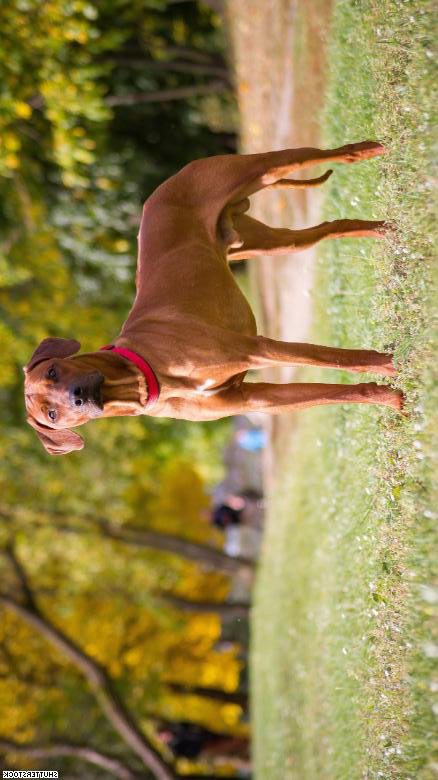

In [15]:
# Convert back into an image
c_img = Image.fromarray(c)

# Showing result
c_img

### 3. Crop Image
Now let's try to add other transformation to the image, which is cropping. To crop an image, besides using the already existed function, we could just slice the matrix of the image. This time I'm going to crop the right and left side of the image so we'd still have the dog object in the image.

In [26]:
# Slicing the matrix
crop_img = np_img[1:400, 100:500]  # only the first 2 dimensions of elements are sliced

#Showing result
crop_img

array([[[124, 126,  19],
        [128, 126,  15],
        [130, 127,  14],
        ...,
        [127, 108,  29],
        [129, 110,  33],
        [132, 113,  37]],

       [[132, 134,  24],
        [134, 133,  17],
        [134, 133,  15],
        ...,
        [128, 110,  28],
        [131, 112,  33],
        [135, 116,  39]],

       [[138, 138,  26],
        [136, 136,  14],
        [136, 137,  10],
        ...,
        [129, 111,  27],
        [133, 115,  33],
        [138, 119,  40]],

       ...,

       [[176, 164, 106],
        [199, 184, 125],
        [189, 170, 114],
        ...,
        [167, 169,  46],
        [157, 156,  47],
        [172, 169,  72]],

       [[190, 178, 120],
        [193, 177, 118],
        [183, 164, 108],
        ...,
        [179, 174,  83],
        [157, 151,  67],
        [157, 149,  74]],

       [[212, 200, 142],
        [182, 165, 109],
        [223, 203, 150],
        ...,
        [177, 168,  99],
        [173, 164,  99],
        [169, 159, 100]]

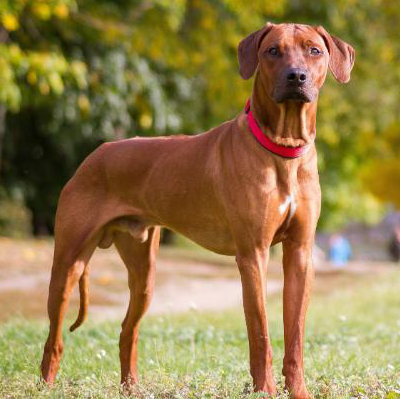

In [27]:
# Convert back from array to image
cr = Image.fromarray(crop_img)

# Showing result
cr

In codes above, I sliced or cut the first 2 dimensions of elements which represent the pixels in x axis and y axis. We'd not want to mess with the third dimension elements because we still want the color as it is. 